Simple Linear Regression / Linear Method vs Sklearn

Author: jvachier <br>
Creation date: April 2021  <br>
Publication date: April 2021 <br>

Goal: Salary prediction as function of the number of years of experience using univariate linear regression, from linear method (built using Python classes) compared to Sklearn (in-built). 

Datasets: From Kaggle https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression



Linear Method <br>

The univariate (single feature) linear regression is given by<br>
$$
f(X) = \beta_0 + X \beta_1 \text{ or } \mathbf{\hat{y}} = \mathbf{X}_b \mathbf{\beta},
$$<br>
where $X$ is the feature (the number of years of experience), $\mathbf{X}_b$ the matrix $Nx2$ with a $1$ in the first position ($N$ the size of the output $\mathbf{y}$), and $\mathbf{\beta} = (\beta_0,\beta_1)^T$ are the parameters of the model that are learned.<br>
A popular method to determine the parameters $\mathbf{\beta}$ is to use the method of least squares. The parameters $\mathbf{\beta}$ are chosen such that they minimize the residual sum of squares
$$
RSS(\mathbf{\beta}) = \sum\limits_{i=1}^{N}(y_i - f(x_i))^2 \text{ or } RSS(\mathbf{\beta}) = (\mathbf{y}-\mathbf{X}_b \mathbf{\beta})^T(\mathbf{y}-\mathbf{X}_b \mathbf{\beta}).
$$
The first and second derivatives are given by
$$
\frac{\partial}{\partial \mathbf{\beta}} RSS = - 2 \mathbf{X}_b^T (\mathbf{y}-\mathbf{X}_b \mathbf{\beta}),
$$
and
$$
\frac{\partial}{\partial \mathbf{\beta}\partial \mathbf{\beta}^T} RSS = 2 \mathbf{X}_b^T \mathbf{X}_b \text{ with } \mathbf{X}_b^T \mathbf{X}_b > 0.
$$
Setting the first derivative to zero
$$
\mathbf{X}_b^T (\mathbf{y}-\mathbf{X}_b \mathbf{\beta}) = 0,
$$
gives the solution
$$
\mathbf{\beta} = (\mathbf{X}_b^T\mathbf{X}_b)^{-1}\mathbf{X}_b^T\mathbf{y}
$$
The predicted values are 
$$
\mathbf{\hat{y}} = \mathbf{X}_b \mathbf{\beta}.
$$
These latest will be compared to the ones obtained using a linear regression model from Sklearn.



References: 
- 'The Elements of Statistical Learning' Hastie, Tibshirani, Friedman Springer (2017)
- https://docs.python.org/3/tutorial/classes.html

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [149]:
class linear_regression:
    def __init__(self):
        """
            This method doesnot take any initial attributes. 
        """
        self.x = None 
        self.y = None
        
    def univariate_linear_regression(self,x,y):
        matrix_x =  pd.DataFrame({'p0':np.ones(len(x)), 'p1':x})
        matrix_x_numpy = matrix_x.to_numpy()
        beta = np.dot(np.linalg.inv((np.dot(matrix_x_numpy.T,matrix_x_numpy))),np.dot(matrix_x_numpy.T,y))
        yy = np.dot(matrix_x_numpy,beta)
        return yy
    
    def skleanrn_LR(self,x,y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
        linear_reg = LinearRegression().fit(x_train, y_train)
        pred_lr = linear_reg.predict(x_test)
        return x_test, y_test, pred_lr
    
    def score_skleanrn_LR(self,y_test, pred_lr):
        mse = mean_squared_error(y_test,pred_lr)
        r2  = r2_score(y_test,pred_lr)
        return np.sqrt(mse), r2
    
    def visualization(self,x,y,y_prediction,x_test,y_test,pred_lr):
        plt.plot(x,y,'b.',label='Row Data')
        plt.plot(x,y_prediction,'r',label='Linear Method')
        plt.plot(x_test,pred_lr,'go',label='Sklearn')
        plt.xlabel('Years of Experience',fontsize=18)
        plt.ylabel('Salary',fontsize=18)
        plt.legend()

Root Mean Squared Error:  6261.928450380868  | R2 Score or Coefficient of determination:  0.9632654149764545


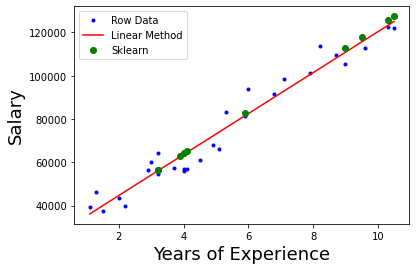

In [150]:
if __name__ == '__main__':
    df = pd.read_csv('Salary_Data.csv')
    #Linear Method
    df_expe = df['YearsExperience']
    df_sala = df['Salary']
    
    #Sklearn
    df_expe_x = df['YearsExperience'].values.reshape(-1, 1)
    df_sala_y = df['Salary'].values.reshape(-1, 1)
    
    yy                      = linear_regression()
    
    y_prediction            = yy.univariate_linear_regression(df_expe,df_sala)
    x_test, y_test, pred_lr = yy.skleanrn_LR(df_expe_x,df_sala_y)
    y_plot = yy.visualization(df_expe,df_sala,y_prediction,x_test, y_test, pred_lr)
    root_mse, r2 = yy.score_skleanrn_LR(y_test, pred_lr)
    
    print("Root Mean Squared Error: ",mse," | R2 Score or Coefficient of determination: ",r2)